# Surprise Housing

##### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

##### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1) Which variables are significant in predicting the price of a house, and

2) How well those variables describe the price of a house.

## 1. Data Understanding and Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
house = pd.read_csv("/Users/personal/Downloads/train.csv")

In [4]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# MSSubClass isn't numerical as the numbers represent a category of house. We may need to change the type.
house['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [8]:
house['GarageYrBlt'].astype('category').value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1906.0     1
1927.0     1
1933.0     1
1900.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [9]:
#NA in Fence means there is no fence but dataframe has considered it as No data. so the count is 281.
house['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [10]:
#NA(No alley access) noticed in Alley as well
house['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
#NA(No Pool) noticed in PoolQC as well.
house['PoolQC'].describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [12]:
#LotFrontage has some null values which should be replaced
house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
house['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [22]:
#MiscFeature has very few values
house['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [18]:
# Some null values in MasVnrType
house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
# NA means No Fireplace, 
house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [27]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
# OverallQual is supposed to be categorical
house['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [29]:
# OverallCond is supposed to be categorical
house['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [30]:
#8 missing values in MasVnrArea and MasVnrType
house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
#NA has been considered as Null value in both BsmtCond and BsmtQual
house['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [38]:
# BsmtExposure, BsmtFinType1, BsmtFinType2 have NA values treated as null values.

house['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [40]:
# One null value in Electrical
house['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [41]:
# NA is considered as Null value in GarageType, 
# No Garage means no value in GarageYrBlt, 
# NA in GarageFinish is considered as Null value
# Same situation noticed in GarageQual and GarageCond   
house['GarageType'].value_counts()   
    

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [42]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
# Most of the values are 0. Can be dropped.
house['MiscVal'].value_counts()   

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [45]:
# MoSold and YrSold should be categorical.
house['YrSold'].value_counts()   

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

###### Lets try to get all the numeric variables and check the relationship

In [46]:
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [47]:
# dropping the variables which are supposed to be categorical but are numeric in dataframe 
house_numeric = house_numeric.drop(['MoSold','YrSold','OverallCond','OverallQual','MSSubClass'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,2,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,2,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,2,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,3,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,3,836,192,84,0,0,0,0,0,250000


In [48]:
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


In [ ]:
# correlation matrix
cor = house_numeric.corr()
cor

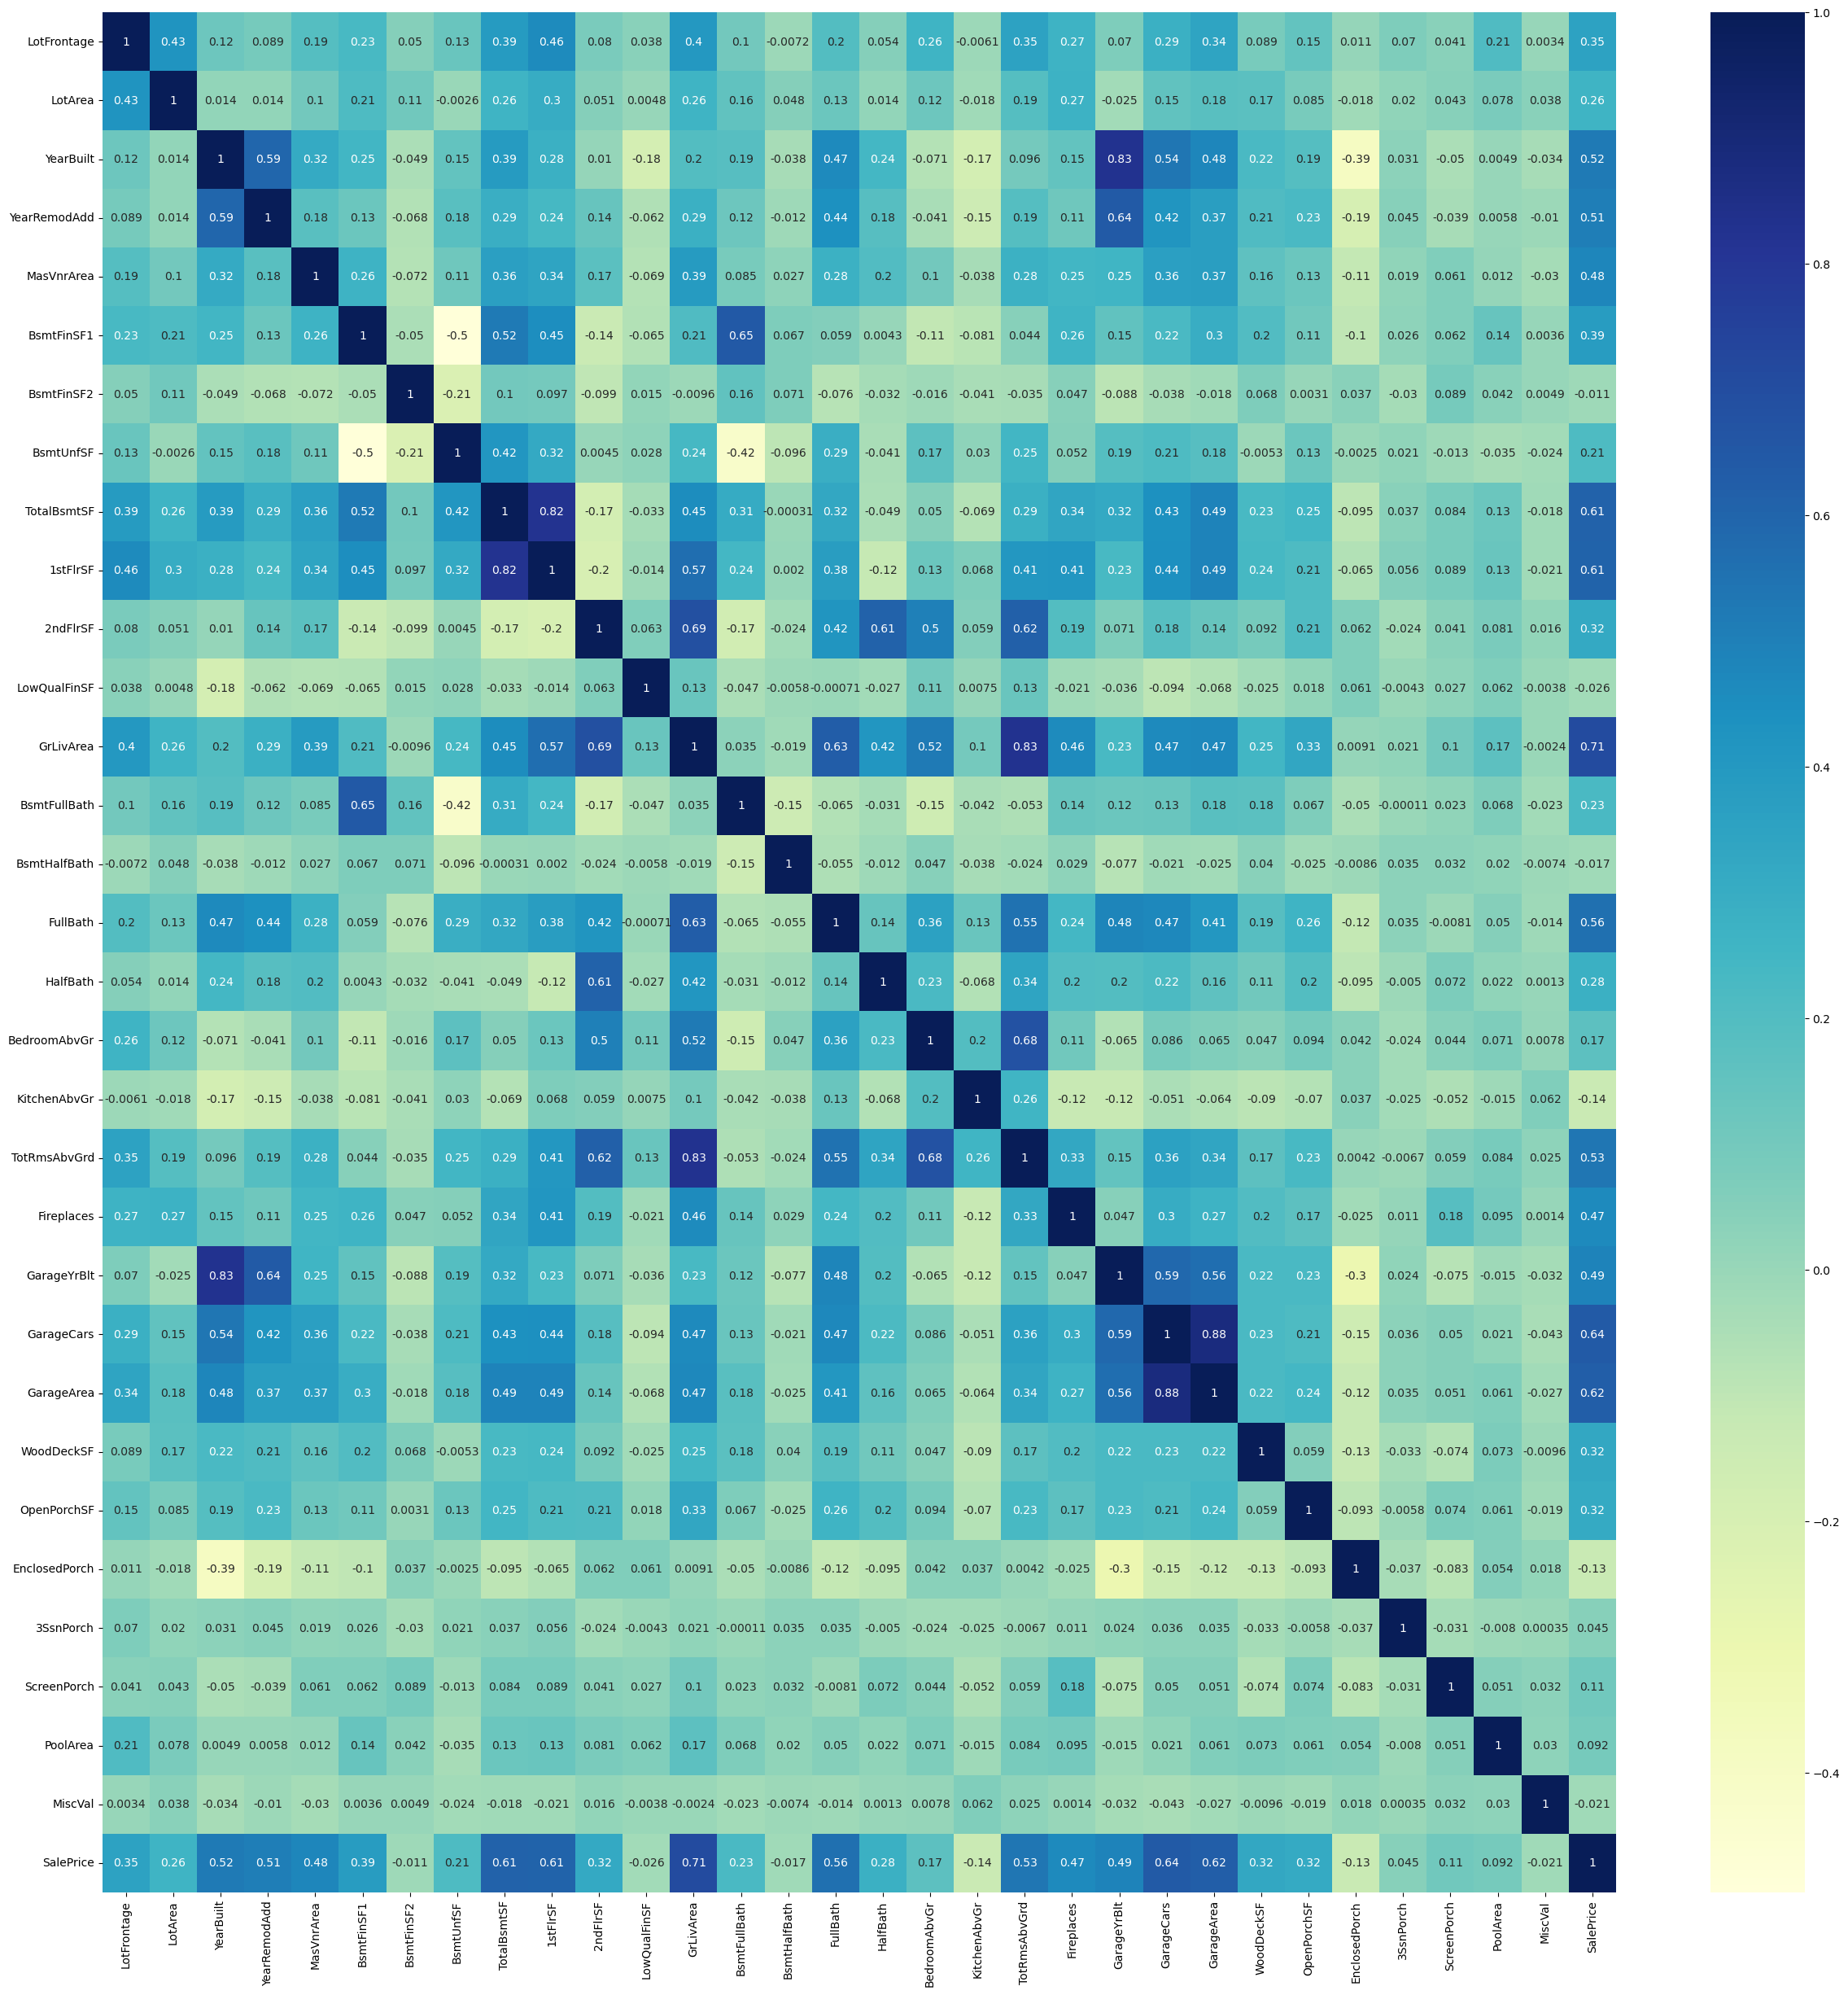

In [56]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

##### Insights from the heatmap:

1) We see high positive corelation between following independent variables:
Garagearea-GarageCars, GarageYrbuilt-YearBuilt, TotrmsabvGrd-GrLivArea, TotalBsmtSF-1stFlrSF


2) Sale price is positively corelated with GrLivArea, GarageArea, GarageCars, TotalBSMTSF etc.


3) Sale price is mild negatively corelated with KitchenAbvGr, EnclosedPorch

Thus, while building the model, we'll have to pay attention to multicollinearity.

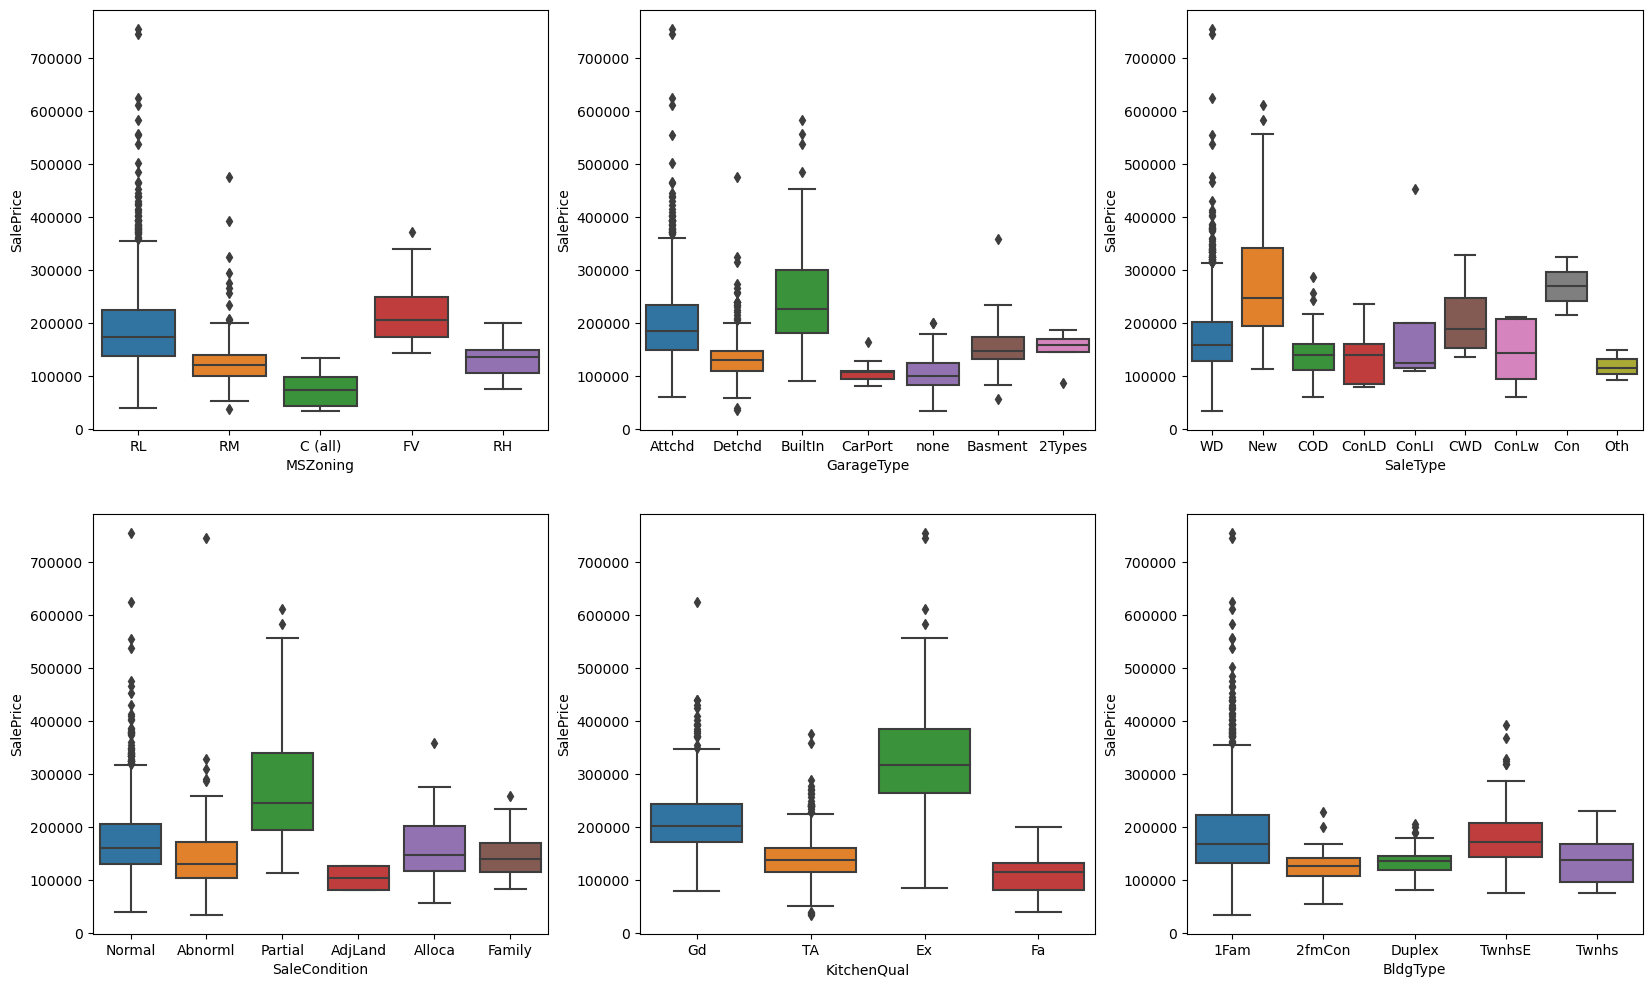

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house)
plt.subplot(2,3,3)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house)
plt.subplot(2,3,4)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house)
plt.subplot(2,3,5)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house)
plt.subplot(2,3,6)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house)
plt.show()

##### Insights from the plots:

1) KitchenQuality, Partial salecondition, New Saletype, Builtin garage have positive corelation with Sale price. 

2) Building type doesn't seem to have much effect on Sale price

## 2. Data Cleaning

We have noticed some null values in few fields. Lets drop the columns or replace them with valid values.

In [14]:
# LotFrontage has NA values which is being replaced by 0, assuming that NA means no LotFrontage
house['LotFrontage'] =  house['LotFrontage'].replace(np.nan, 0)

In [15]:
# Fence is a categorical variable which has NA meaning there is no fence.
# FireplaceQu is a categorical variable which has NA meaning there is no Fireplace.
house[['Fence', 'FireplaceQu']] = house[['Fence', 'FireplaceQu']].fillna('none')

In [17]:
# Alley, PoolQC and MiscFeature have very less values like 90, 7, 54 respectively, compared to the dataset.
house = house.drop(['Alley','PoolQC','MiscFeature'], axis=1)

In [19]:
# MasVnrType has few NA values. Replacing it with 'None'
house[['MasVnrType']] = house[['MasVnrType']].fillna('None')

In [20]:
# MasVnrArea has NA values which are basically for MasVnrType = NA. 
# Replacing them with 0 assuming there is no veneer area
house['MasVnrArea'] =  house['MasVnrArea'].replace(np.nan, 0)

In [21]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 has NA values meaning 'No Basement'
house[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']] = house[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']].fillna('none')

In [22]:
# NA is considered as Null value in GarageType, 
# No Garage means no value in GarageYrBlt 
# NA in GarageFinish is considered as Null value
# Same situation noticed in GarageQual and GarageCond   
# Lets replace the Na values with none


# Converting GarageYrBlt to categorical and then replacing year with 0000
house['GarageYrBlt'] = house['GarageYrBlt'].astype('object')
house[['GarageYrBlt']] = house[['GarageYrBlt']].fillna('0000')

house[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = house[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('none')



In [23]:
# One null value in Electrical
house['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [24]:
# Lets replace it with 'SBrkr' as it is the most common value
house[['Electrical']] = house[['Electrical']].fillna('SBrkr')

In [25]:
# There are some variables which are marked as numerical but they are categorical
# Lets convert them to categorical
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['YearBuilt'] = house['YearBuilt'].astype('object')
house['YearRemodAdd'] = house['YearRemodAdd'].astype('object')
house['MoSold'] = house['MoSold'].astype('object')
house['YrSold'] = house['YrSold'].astype('object')


In [26]:
# Lets drop id field
house = house.drop(['Id'], axis=1)

In [27]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,none,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,none,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,none,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,none,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,none,0,12,2008,WD,Normal,250000


In [28]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   object 
 18  YearRemo

In [29]:
# Defining the map function for mnth
def mnth_map(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',
                 5:'may', 6:'jun', 7:'jul', 8:'aug',
                 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

# Applying the function to the mnth feature
house[['MoSold']] = house[['MoSold']].apply(mnth_map)

In [32]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,none,0,feb,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,none,0,may,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,none,0,sep,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,none,0,feb,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,none,0,dec,2008,WD,Normal,250000


## 3. Data Preparation 

Lets prepare the data for model evaluation. Split the train and test data.

In [36]:
house_test = house

In [37]:
# split into X and y
y = house_test.pop('SalePrice')
X = house_test

In [38]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()



,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,none,feb,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,none,may,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,none,sep,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,none,feb,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,none,dec,2008,WD,Normal


In [39]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [41]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [42]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=556)

In [44]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.212877,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.645747,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.299451,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.068587,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.761179,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [43]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

### Linear Regression



In [45]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

6153382195602549.0
[ 7.11540827e+02  6.73780197e+03  2.26097754e+03  6.11760051e+16
  2.16376013e+16  5.92671963e+16 -5.88431298e+16 -8.43029728e+15
 -9.51935129e+15 -1.06032083e+15  1.14591215e+16  7.48000000e+02
 -7.01000000e+02  6.68000000e+02 -7.58000000e+02 -4.13350000e+03
 -1.18200000e+03 -2.27250000e+02  1.98200000e+03  5.29100000e+03
  2.46000000e+02  6.10000000e+02  1.55806250e+03  1.15575000e+03
  2.06300000e+03  2.39600000e+03  3.17500000e+03 -3.88062500e+02
 -2.61500000e+02 -3.04500000e+02 -2.34800000e+03 -7.28250000e+02
  3.14400000e+03  4.28000000e+02 -2.84800000e+03 -7.90500000e+02
 -2.04925000e+03 -4.65874664e+16  4.86000000e+02  1.78375000e+03
 -4.00000000e+01  9.60167662e+15  7.38887500e+03  3.98275000e+03
  1.71950000e+04  1.10700000e+04  2.96000000e+02  3.64000000e+02
  6.61500000e+02  3.20000000e+02 -4.29500000e+02 -1.47600000e+03
  1.10000000e+02 -3.41000000e+02  1.92600000e+03 -1.17100000e+03
  2.27500000e+02 -5.30000000e+02  2.01500000e+02 -3.88600000e+03
  7.55

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9697470994661557
-1.3420878661186524e+25
193034646117.0
3.782959885059768e+37
189064295.90303624
8.636894714748328e+34


#### We can notice overfitting here as the R2 score on train data is at 97% but the test data is negative.

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge regression

In [49]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [51]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.72624954e+01  2.73434798e+03  3.26705687e+03  2.09585901e+03
  8.51042308e+02  8.55607276e+02  3.35366662e+03  5.24478871e+03
  4.17850002e+03 -4.94785091e+02  7.28390104e+03  2.43150750e+03
  1.12584558e+02  4.27229718e+03  1.89899595e+03  7.83114889e+02
 -1.54432301e+03  4.03926630e+03  2.61246872e+03  4.49116543e+03
  2.79956483e+03  1.54961579e+03  9.84378215e+02  5.04020744e+01
  1.26339833e+03  1.40970130e+03 -7.44269302e+02 -1.10938996e+02
 -1.04880202e+03 -3.70238269e+01 -2.81709694e+01 -1.19471987e+02
  7.13603604e+02  4.96453433e+02  2.34443774e+02 -6.63771133e+02
 -3.09514872e+02 -7.10954894e+02 -1.48276695e+03 -1.30917345e+03
 -5.94815425e+02 -1.19198455e+03  6.51301309e+02  5.26747270e+01
  1.38128727e+03 -1.03249300e+03  4.32240700e+02  2.07647428e+02
 -1.95639496e+03 -7.06688430e+01  8.87209347e+02  7.14924913e+02
  1.52267559e+03 -7.72576508e+02  2.16329619e+03 -9.99608245e+02
 -3.61358221e+02 -4.85217329e+02  7.01546336e+02  2.32485684e+02
 -5.27902141e+01 -2.51002

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.904912224245475
0.85209460221669
606726456601.8423
416902798038.2645
594247264.0566525
951832872.2334807


##### After penalising some variables, we do see some good numbers. 
R2 score on train and test data are closer

### Lasso regression

In [53]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [55]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [56]:
lasso.coef_

array([-0.00000000e+00,  3.56134045e+03,  1.56702034e+03,  2.42427354e+03,
        2.08372349e+02, -0.00000000e+00,  3.64337035e+03,  0.00000000e+00,
        0.00000000e+00, -2.26582874e+03,  3.04329377e+04,  2.66902484e+03,
        0.00000000e+00,  2.98379508e+03,  3.94391319e+02, -5.93618394e+02,
       -5.18599800e+03,  0.00000000e+00,  2.41252079e+02,  6.72336275e+03,
        0.00000000e+00,  1.18752066e+02,  1.17050117e+02, -0.00000000e+00,
        1.18833380e+03,  1.04827104e+03, -0.00000000e+00,  0.00000000e+00,
       -2.53958210e+02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -6.02486799e+02, -0.00000000e+00,
        0.00000000e+00, -1.14723150e+02, -5.44575339e+02, -1.85569296e+02,
       -0.00000000e+00, -1.14064878e+03,  0.00000000e+00,  0.00000000e+00,
        2.10480552e+03, -0.00000000e+00,  1.82065434e+02,  0.00000000e+00,
       -8.27028473e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.34428969e+03, -

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9371319236004495
0.8392449593297036
401142259608.0443
453122247454.33984
392891537.3242354
1034525679.1194974


In [58]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.697471e-01,9.049122e-01,9.371319e-01
1,R2 Score (Test),-1.342088e+25,8.520946e-01,8.392450e-01
2,RSS (Train),1.930346e+11,6.067265e+11,4.011423e+11
3,RSS (Test),3.782960e+37,4.169028e+11,4.531222e+11
4,MSE (Train),1.375007e+04,2.437719e+04,1.982149e+04
5,MSE (Test),2.938859e+17,3.085179e+04,3.216404e+04


### Looking at the R2 square of train and test data, Ridge regression turns out to be the best model as the difference between the R2 scores of test and train set is small. 

## Lets observe the changes in the coefficients after regularization

In [59]:
betas = pd.DataFrame(index=X.columns)

In [60]:
betas.rows = X.columns

In [61]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [63]:
pd.set_option('display.max_rows', None)
betas.head(75)

,Linear,Ridge,Lasso
LotFrontage,7.115408e+02,37.262495,-0.000000
LotArea,6.737802e+03,2734.347979,3561.340455
MasVnrArea,2.260978e+03,3267.056867,1567.020343
BsmtFinSF1,6.117601e+16,2095.859010,2424.273543
BsmtFinSF2,2.163760e+16,851.042308,208.372349
BsmtUnfSF,5.926720e+16,855.607276,-0.000000
TotalBsmtSF,-5.884313e+16,3353.666617,3643.370348
1stFlrSF,-8.430297e+15,5244.788714,0.000000
2ndFlrSF,-9.519351e+15,4178.500023,0.000000
LowQualFinSF,-1.060321e+15,-494.785091,-2265.828744


In [65]:
betas.sort_values(by=['Ridge'], ascending=False)

,Linear,Ridge,Lasso
GrLivArea,1.145912e+16,7.283901e+03,30432.937716
OverallQual_10,1.159493e+16,6.678419e+03,12302.415022
OverallQual_9,1.776514e+16,6.547307e+03,12591.535865
1stFlrSF,-8.430297e+15,5.244789e+03,0.000000
Neighborhood_NoRidge,2.666000e+03,5.221587e+03,4577.929749
RoofMatl_WdShngl,5.505000e+04,5.027739e+03,21549.129382
Neighborhood_NridgHt,1.976000e+03,4.606306e+03,4352.929694
GarageCars,5.291000e+03,4.491165e+03,6723.362745
FullBath,6.680000e+02,4.272297e+03,2983.795084
2ndFlrSF,-9.519351e+15,4.178500e+03,0.000000


##### Looking at the column Ridge in table above,Sale prices depends upon Above grade (ground) living area, First and 2nd Floor square feet, Garage Area, Full bath, Total rooms etcs.
##### Also houses with OverallQual of 8 or above and close to Northridge and Northridge Heights affect the sale price.

In [66]:
#Fitting Ridge model for alpha = 1000 to answer the graded questions and printing coefficients which have been penalised
alpha = 1000
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train, y_train)
print(ridge_double.coef_)

[ 5.05730628e+02  2.26963594e+03  3.21663164e+03  2.27518621e+03
  6.81005136e+02  8.80540136e+02  3.50269040e+03  4.66575734e+03
  3.23196025e+03 -3.55524564e+02  6.08449055e+03  2.05270715e+03
  6.93473560e+01  3.60040163e+03  1.75638931e+03  9.70770920e+02
 -1.20434791e+03  3.80354710e+03  2.73112517e+03  3.78936854e+03
  3.04749778e+03  1.74176600e+03  1.05492054e+03 -4.88282583e+01
  9.50775098e+02  1.12771027e+03 -2.07236386e+02 -6.21266984e+01
 -1.06411880e+03  4.77518417e+01  7.47960621e+00 -1.04188457e+02
  1.13654225e+03  5.13089736e+02  1.41119832e+02 -5.62221385e+02
 -2.95006348e+02 -6.34112437e+02 -1.10108672e+03 -1.10617969e+03
 -5.18662325e+02 -8.91395494e+02  5.42390066e+02  3.30361390e+00
  1.20931859e+03 -1.15661596e+03  3.75891589e+02  3.30054962e+02
 -1.49383242e+03 -5.50415342e+02  7.19449206e+02  6.06594838e+02
  8.64989412e+02 -6.24301588e+02  1.73401043e+03 -7.03993490e+02
 -2.14232212e+02 -4.60490422e+02  5.91583608e+02  2.36439709e+02
 -1.21670008e+01 -3.15923

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.881027503865949
0.8439918384561004
759127663253.3298
439742159780.70667
743513871.9425366
1003977533.7459056


In [68]:
#Fitting Lasso model for alpha = 1000 to answer the graded question and printing coefficients which have been penalised

alpha =1000

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train, y_train) 
lasso_double.coef_

array([-0.00000000e+00,  3.09587446e+03,  1.08412619e+03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.27234462e+03,  0.00000000e+00,
        0.00000000e+00, -1.66472641e+03,  2.78535233e+04,  3.17964298e+03,
        0.00000000e+00,  3.34352137e+03,  2.02686761e+02, -0.00000000e+00,
       -4.94815340e+03,  0.00000000e+00,  0.00000000e+00,  8.40792373e+03,
        0.00000000e+00,  6.76285908e+00,  0.00000000e+00, -0.00000000e+00,
        8.56006226e+02,  8.02766826e+02, -1.32530372e+03,  0.00000000e+00,
       -9.87069589e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -8.14383099e+01, -0.00000000e+00,
       -0.00000000e+00, -4.92081370e+02,  0.00000000e+00,  0.00000000e+00,
        1.72811127e+03, -1.43921446e+01,  0.00000000e+00,  0.00000000e+00,
       -1.62113539e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.27968488e+02, -

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9019817479829394
0.8361985679623775
625424942972.0992
461709148973.773
612561158.6406457
1054130477.1090708


In [70]:
betas_double = pd.DataFrame(index=X.columns)
betas_double.rows = X.columns
#betas['Linear'] = lm.coef_
betas_double['Ridge_double'] = ridge_double.coef_
betas_double['Lasso_double'] = lasso_double.coef_
pd.set_option('display.max_rows', None)

betas_double.sort_values(by=['Ridge_double'], ascending=False)

,Ridge_double,Lasso_double
GrLivArea,6.084491e+03,27853.523253
OverallQual_10,5.409694e+03,12316.818144
OverallQual_9,5.271289e+03,13916.975370
1stFlrSF,4.665757e+03,0.000000
Neighborhood_NoRidge,4.515894e+03,4691.542184
Neighborhood_NridgHt,3.992911e+03,4893.966949
TotRmsAbvGrd,3.803547e+03,0.000000
GarageCars,3.789369e+03,8407.923726
RoofMatl_WdShngl,3.676154e+03,5497.713408
FullBath,3.600402e+03,3343.521367


In [71]:
betas_double.sort_values(by=['Lasso_double'], ascending=False)

,Ridge_double,Lasso_double
GrLivArea,6.084491e+03,27853.523253
OverallQual_9,5.271289e+03,13916.975370
OverallQual_10,5.409694e+03,12316.818144
OverallQual_8,3.157659e+03,10434.009242
GarageCars,3.789369e+03,8407.923726
RoofMatl_WdShngl,3.676154e+03,5497.713408
BsmtExposure_Gd,3.498009e+03,4959.608026
Neighborhood_NridgHt,3.992911e+03,4893.966949
Neighborhood_NoRidge,4.515894e+03,4691.542184
SaleType_New,1.318154e+03,4576.959104
